In [1]:
from lagrangian_trajectory_clustering.data_loading import (
    load_cape_verde_trajectories,
    load_labsea_trajectories,
    load_medsea_trajectories,
    subset_trajectories,
)

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import cartopy

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [11]:
data_cape_verde = subset_trajectories(
    load_cape_verde_trajectories(year=2017),
    num_traj=4_000,
    use_random=True,
    random_seed=456,
)
display(data_cape_verde)

time   latitude  longitude
traj obs                                 
0    0   1997-08-14  16.030224 -22.692162
     1   1997-08-15  16.017056 -22.714727
     2   1997-08-16  15.994600 -22.739052
     3   1997-08-17  15.954251 -22.766460
     4   1997-08-18  15.938750 -22.811235
...             ...        ...        ...
9994 248 1998-06-07   9.462337 -49.268288
     249 1998-06-08   9.435887 -49.458620
     250 1998-06-09   9.428820 -49.648170
     251 1998-06-10   9.421272 -49.832077
     252 1998-06-10   9.421272 -49.832077

[1181429 rows x 3 columns]

In [5]:
data_labsea = subset_trajectories(
    load_labsea_trajectories(),
    num_traj=4_000,
    use_random=True,
    random_seed=123,
)
display(data_labsea)

latitude  longitude                 time
traj obs                                           
2    0    59.825405 -45.383000  1990-01-03 12:00:00
     1    60.266100 -42.798218  1989-12-29 12:00:00
     2    61.821384 -41.664980  1989-12-24 12:00:00
     3    63.080612 -40.968250  1989-12-19 12:00:00
     4    64.359460 -39.596740  1989-12-14 12:00:00
...             ...        ...                  ...
9996 726        NaN        NaN                  NaN
     727        NaN        NaN                  NaN
     728        NaN        NaN                  NaN
     729        NaN        NaN                  NaN
     730        NaN        NaN                  NaN

[2924000 rows x 3 columns]

In [6]:
data_medsea = subset_trajectories(
    load_medsea_trajectories(),
    num_traj=4_000,
    use_random=True,
    random_seed=123,
)
display(data_medsea)

time   latitude  longitude
traj  obs                                          
2     0   2017-04-05 00:00:00  43.288410   5.178498
      1   2017-04-05 01:00:00  43.285675   5.177588
      2   2017-04-05 02:00:00  43.283050   5.176386
      3   2017-04-05 03:00:00  43.280525   5.174908
      4   2017-04-05 04:00:00  43.278090   5.173171
...                       ...        ...        ...
10001 957 2017-06-11 21:00:00  36.128925  -0.050118
      958 2017-06-11 22:00:00  36.132336  -0.038280
      959 2017-06-11 23:00:00  36.135900  -0.026463
      960 2017-06-12 00:00:00  36.139637  -0.014653
      961 2017-06-12 00:00:00  36.139957  -0.013668

[3848000 rows x 3 columns]

CPU times: user 1min 16s, sys: 115 ms, total: 1min 16s
Wall time: 1min 17s


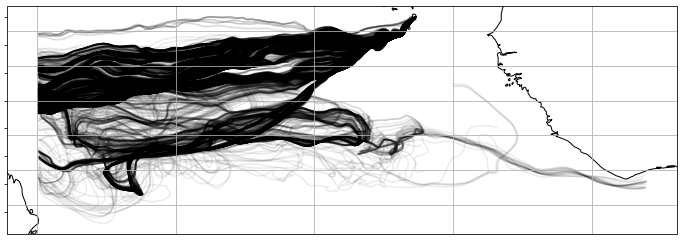

In [14]:
%%time

fig, ax = plt.subplots(
    1, 1,
    figsize=(12, 12),
    subplot_kw={"projection": cartopy.crs.PlateCarree()},
)

(
    data_cape_verde
    .groupby("traj")
    .plot.line(
        x="longitude", y="latitude",
        ax=ax, legend=False,
        alpha=0.08, color="black",
        transform=cartopy.crs.PlateCarree()
    )
)
ax.gridlines()
ax.set_yticklabels([])
_ = ax.coastlines();

CPU times: user 1min 37s, sys: 355 ms, total: 1min 38s
Wall time: 1min 38s


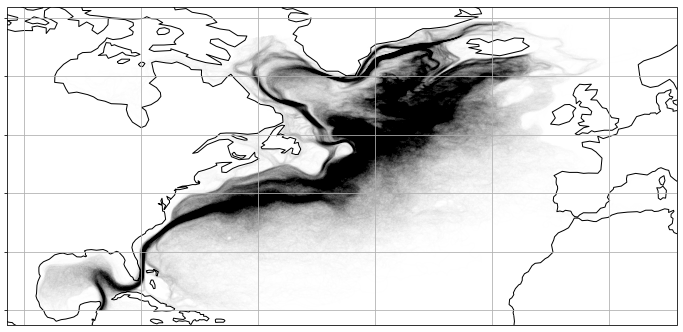

In [8]:
%%time

fig, ax = plt.subplots(
    1, 1,
    figsize=(12, 12),
    subplot_kw={"projection": cartopy.crs.PlateCarree()},
)

(
    data_labsea
    .groupby("traj")
    .plot.line(
        x="longitude", y="latitude",
        ax=ax, legend=False,
        alpha=0.002, color="black",
        transform=cartopy.crs.PlateCarree()
    )
)
ax.gridlines()
ax.set_yticklabels([])
_ = ax.coastlines();

CPU times: user 1min 8s, sys: 261 ms, total: 1min 8s
Wall time: 1min 8s


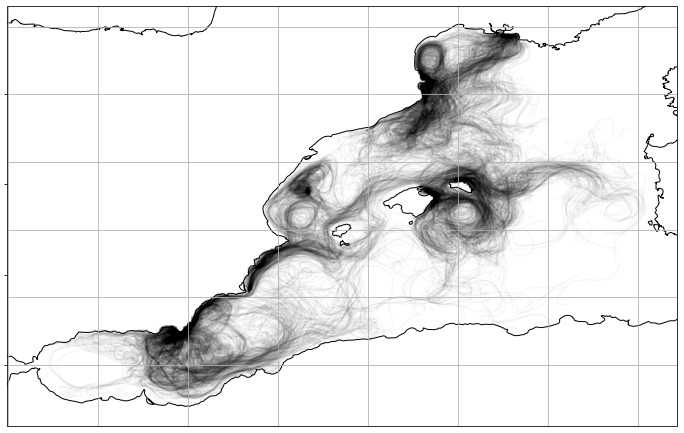

In [9]:
%%time

fig, ax = plt.subplots(
    1, 1,
    figsize=(12, 12),
    subplot_kw={"projection": cartopy.crs.PlateCarree()},
)

(
    data_medsea
    .groupby("traj")
    .plot.line(
        x="longitude", y="latitude",
        ax=ax, legend=False,
        alpha=0.03, color="black",
        transform=cartopy.crs.PlateCarree()
    )
)
ax.gridlines()
ax.set_yticklabels([])
_ = ax.coastlines();

CPU times: user 8min 59s, sys: 551 ms, total: 9min
Wall time: 9min


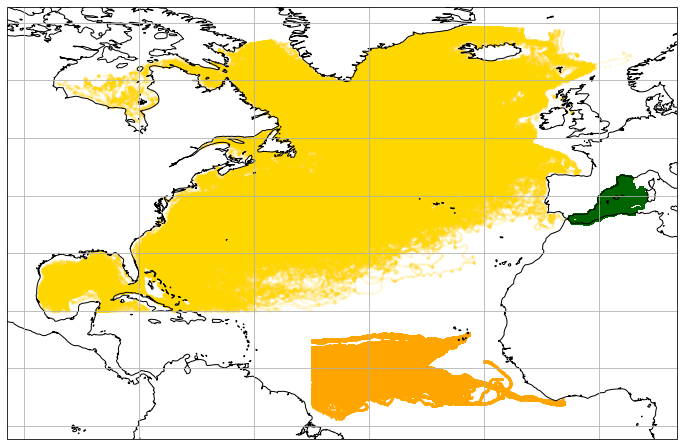

In [13]:
%%time

fig, ax = plt.subplots(
    1, 1,
    figsize=(12, 12),
    subplot_kw={"projection": cartopy.crs.PlateCarree()},
)

(
    data_cape_verde
    .groupby("traj")
    .plot.scatter(
        x="longitude", y="latitude",
        ax=ax, legend=False,
        alpha=1, s=3, color="orange",
        transform=cartopy.crs.PlateCarree()
    )
)

(
    data_labsea
    .groupby("traj")
    .plot.scatter(
        x="longitude", y="latitude",
        ax=ax, legend=False,
        alpha=0.1, s=3, color="gold",
        transform=cartopy.crs.PlateCarree()
    )
)

(
    data_medsea
    .groupby("traj")
    .plot.scatter(
        x="longitude", y="latitude",
        ax=ax, legend=False,
        alpha=1, s=3, color="darkgreen",
        transform=cartopy.crs.PlateCarree()
    )
)

ax.gridlines()
ax.set_yticklabels([])
_ = ax.coastlines("50m");